<a href="https://colab.research.google.com/github/HashemMZ/keras-succinctly/blob/master/AE_CNN_ver2_010420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28)


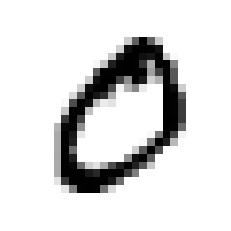

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on *** 2022
implementing an Autoencoder using convolutional nets.
ver2: changing the layers according to the layers needed for GAN
@author: Hashem
"""

from keras.datasets import mnist
from tensorflow import keras as K

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# shape of data
print(x_train.shape)

# plot one of the digits

import matplotlib.pyplot as plt
plt.imshow(x_train[1], cmap = 'binary')
plt.axis('off')
plt.show()
# data pre
x_train = x_train.astype('float64') / 255.
x_test = x_test.astype('float64') / 255.

In [ ]:
# functions for plotting digits
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
def show_reconstructions(model, n_images=10):
    reconstructions = model.predict(x_test[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(x_test[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

In [ ]:
# define model

init = K.initializers.glorot_uniform()
optimizer = K.optimizers.Adadelta()

# encoder definition
encoder = K.models.Sequential([
    K.layers.Conv2D(filters = 32, kernel_size=(3,3), strides = (1,1),\
                    padding = 'same', kernel_initializer=init,\
                    activation = 'relu',input_shape=(28,28,1)),
    #K.layers.Conv2D(filters = 64, kernel_size=(3,3), strides = (1,1),\
    #               padding = 'same', kernel_initializer=init,\
    #               activation = 'relu'),
    K.layers.MaxPooling2D(pool_size=(2,2)),
    K.layers.Dropout(0.4),

    K.layers.Flatten(),
    K.layers.Dense(units=100,kernel_initializer=init, activation = 'relu'), 
    K.layers.Dense(30,activation= 'relu')

    ])
discriminator = K.models.Sequential([
    K.layers.Conv2D(filters = 32, kernel_size=(3,3), strides = (2,2),\
                    padding = 'same', kernel_initializer=init,\
                    input_shape=(28,28,1)),
    #K.layers.BatchNormalization(),
    K.layers.Activation('relu'),
    K.layers.Dropout(0.4),

    K.layers.Conv2D(filters = 64, kernel_size=(3,3), strides = (2,2),\
                   padding = 'same', kernel_initializer=init),
    K.layers.Activation('relu'),
    K.layers.Dropout(0.4),

    K.layers.Flatten(),
    #K.layers.Dense(units=100,kernel_initializer=init, activation = 'relu'), 
    K.layers.Dense(128,activation= 'relu')

    ])
# decoder def
decoder = K.models.Sequential([
   
    K.layers.Dense(7 * 7 * 128, input_shape=[30]),
    K.layers.Reshape([7, 7, 128]),
    K.layers.BatchNormalization(),
    K.layers.Conv2DTranspose(1, kernel_size=5, strides=4, padding="same",
    activation="sigmoid"),
    #K.layers.BatchNormalization(),
    #K.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
    #activation="tanh"),
    K.layers.Reshape([28,28])
    ])


# generator def
generator = K.models.Sequential([
   
    K.layers.Dense(7 * 7 * 128, input_shape=[128]),
    K.layers.Reshape([7, 7, 128]),
    K.layers.BatchNormalization(),

    K.layers.Conv2DTranspose(1, kernel_size=5, strides=1, padding="same",activation='relu'),    
    K.layers.BatchNormalization(),

    K.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",activation='relu'),    
    K.layers.BatchNormalization(),


    K.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
    activation="sigmoid"),
    K.layers.Reshape([28,28])
    ])
#%% compile and fit
autoencoder = K.models.Sequential([discriminator,generator])


In [ ]:
autoencoder.summary()
generator.summary()
discriminator.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 128)               420352    
                                                                 
 sequential_12 (Sequential)  (None, 28, 28)            812861    
                                                                 
Total params: 1,233,213
Trainable params: 1,232,953
Non-trainable params: 260
_________________________________________________________________
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 6272)              809088    
                                                                 
 reshape_6 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 batch_normalizati

In [ ]:
#%%
myOpt = K.optimizers.Adam()
autoencoder.compile(loss='mse', optimizer = myOpt) #binary_crossentropy

In [ ]:
history = autoencoder.fit(x_train,x_train, epochs = 15, batch_size = 512, validation_data=[x_test,x_test])

Epoch 1/15
118/118 [==============================] - 43s 356ms/step - loss: 0.0365 - val_loss: 0.0403
Epoch 2/15
118/118 [==============================] - 42s 353ms/step - loss: 0.0287 - val_loss: 0.0274
Epoch 3/15
118/118 [==============================] - 42s 358ms/step - loss: 0.0269 - val_loss: 0.0250
Epoch 4/15
118/118 [==============================] - 42s 355ms/step - loss: 0.0255 - val_loss: 0.0233
Epoch 5/15
118/118 [==============================] - 42s 356ms/step - loss: 0.0246 - val_loss: 0.0226
Epoch 6/15
118/118 [==============================] - 45s 379ms/step - loss: 0.0239 - val_loss: 0.0217
Epoch 7/15
118/118 [==============================] - 46s 390ms/step - loss: 0.0232 - val_loss: 0.0221
Epoch 8/15
118/118 [==============================] - 45s 382ms/step - loss: 0.0226 - val_loss: 0.0203
Epoch 9/15
118/118 [==============================] - 45s 382ms/step - loss: 0.0220 - val_loss: 0.0210
Epoch 10/15
118/118 [==============================] - 45s 383ms/step - l

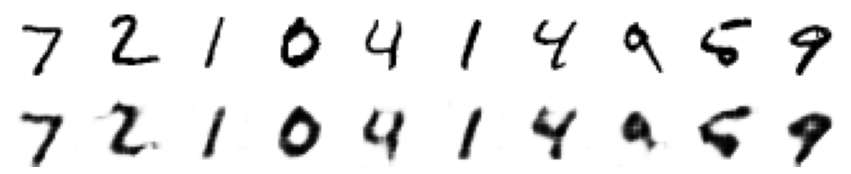

In [ ]:
show_reconstructions(autoencoder)